In [237]:
# 데이터 셋  불러오기

In [238]:
#pip install missingno

In [239]:
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import koreanize_matplotlib

In [240]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# 데이터 검증
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error


In [241]:
data = './Data/used_cars_data.csv'
car_df = pd.read_csv(data)

In [242]:
car_df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


-	S.No.: 차량의 일련 번호
-	Name: 차량의 이름 (브랜드 이름과 모델 이름 포함)
-	Location: 차량이 판매되거나 구매 가능한 위치 (도시)
-	Year: 차량의 제조 연도
-	Kilometers_driven: 이전 소유자가 차량을 운전한 총 거리 (KM 단위)
-	Fuel_Type: 차량이 사용하는 연료 종류 (가솔린, 디젤, 전기, CNG, LPG)
-	Transmission: 차량에 사용된 변속기 종류 (자동/수동)
-	Owner: 차량의 소유 유형
-	Mileage: 자동차 회사가 제공하는 표준 연비 (kmpl 또는 km/kg 단위)
-	Engine: 차량 엔진의 배기량 (CC 단위)
-	Power: 차량 엔진의 최대 출력 (bhp 단위)
-	Seats: 차량의 좌석 수
-	New_Price: 동일 모델의 새 차량 가격 (인도 루피 Lakhs 단위, 1 Lakh = 100,000 INR)
-	Price: 중고차 가격 (인도 루피 Lakhs 단위, 1 Lakh = 100,000 INR

In [243]:
# 환율 (예시: 1 INR = 16.75 KRW)
exchange_rate = 16.75

# 중고차 가격을 한국 원화로 변환 후 백만 원 단위로 변환
car_df['Price'] = (car_df['Price'] * 100000 * exchange_rate) / 1000000

# 결과 출력
print(car_df[['Price']])

         Price
0      2.93125
1     20.93750
2      7.53750
3     10.05000
4     29.71450
...        ...
7248       NaN
7249       NaN
7250       NaN
7251       NaN
7252       NaN

[7253 rows x 1 columns]


In [244]:
car_df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

In [245]:
car_df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

<Axes: >

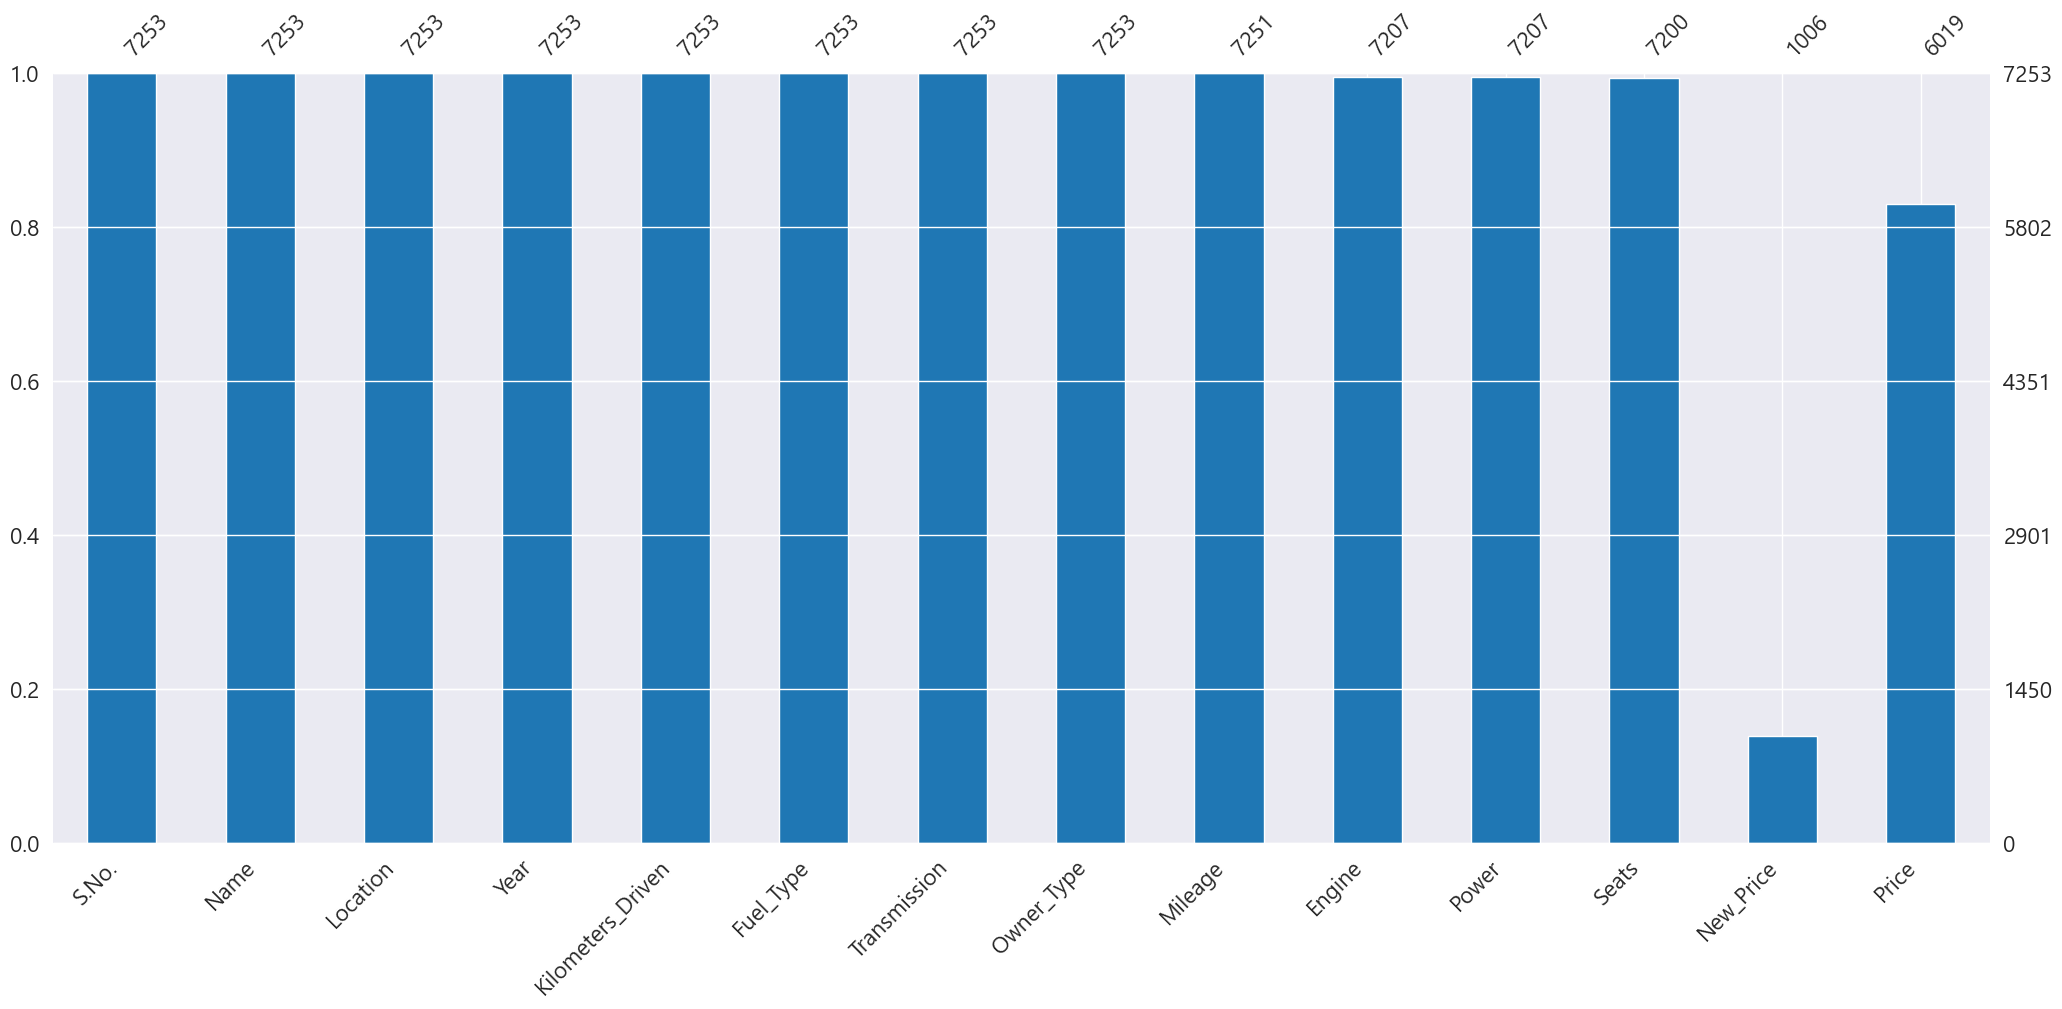

In [246]:
# 각각의 컬럼 결측치 시각화
msno.bar(car_df, color='#1f77b4')

In [247]:
print ("Rows     : " , car_df.shape[0])  # 데이터셋 행 갯수
print ("Columns  : " , car_df.shape[1]) # 데이터셋 컬럼 갯수
print ("#"*40,"\n","Features : \n\n", car_df.columns.tolist()) #features 갯수
print ("#"*40,"\n결측치 :\n\n", car_df.isnull().sum().sort_values(ascending=False)) # 결측치 확인
print( "#"*40,"\n결측치 비율 :\n\n", round(car_df.isna().sum() / car_df.isna().count() * 100, 2)) # 결측치 % 
print ("#"*40,"\n 고유값 :  \n\n", car_df.nunique())  #  고유값

Rows     :  7253
Columns  :  14
######################################## 
 Features : 

 ['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']
######################################## 
결측치 :

 New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
Transmission            0
Owner_Type              0
dtype: int64
######################################## 
결측치 비율 :

 S.No.                 0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.6

In [248]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [249]:
car_df.columns

Index(['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [250]:
for col in car_df.columns:
	print(f'컬럼 고유값 {col} : {car_df[col].unique()}')

컬럼 고유값 S.No. : [   0    1    2 ... 7250 7251 7252]
컬럼 고유값 Name : ['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Ford EcoSport 1.5 Petrol Ambiente'
 'Jeep Compass 1.4 Sport' 'Hyundai Elite i20 Magna Plus']
컬럼 고유값 Location : ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
컬럼 고유값 Year : [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998 1996]
컬럼 고유값 Kilometers_Driven : [72000 41000 46000 ... 89411 52262 72443]
컬럼 고유값 Fuel_Type : ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
컬럼 고유값 Transmission : ['Manual' 'Automatic']
컬럼 고유값 Owner_Type : ['First' 'Second' 'Fourth & Above' 'Third']
컬럼 고유값 Mileage : ['26.6 km/kg' '19.67 kmpl' '18.2 kmpl' '20.77 kmpl' '15.2 kmpl'
 '21.1 km/kg' '23.08 kmpl' '11.36 kmpl' '20.54 kmpl' '22.3 kmpl'
 '21.56 kmpl' '16.8 kmpl' '25.2 kmpl' '12.7 kmpl' '0.0 kmpl' '13.5 kmpl'
 '25.8 kmpl' '28.4 kmpl' '20.45 kmpl' 

-	의미 없는 컬럼 
-	S.no, Location, New Price?

In [251]:
# 필요 없는 컬럼 드랍
car_df = car_df.drop(columns=['S.No.', 'Location','New_Price'])

In [252]:
car_df[['Engine','Power','Mileage']].head(10)

,Engine,Power,Mileage
0,998 CC,58.16 bhp,26.6 km/kg
1,1582 CC,126.2 bhp,19.67 kmpl
2,1199 CC,88.7 bhp,18.2 kmpl
3,1248 CC,88.76 bhp,20.77 kmpl
4,1968 CC,140.8 bhp,15.2 kmpl
5,814 CC,55.2 bhp,21.1 km/kg
6,1461 CC,63.1 bhp,23.08 kmpl
7,2755 CC,171.5 bhp,11.36 kmpl
8,1598 CC,103.6 bhp,20.54 kmpl
9,1248 CC,74 bhp,22.3 kmpl


-	엔진 컬럼 CC 처리
-	파워 bhp 처리
-	연비 0.0값 ,Nan 값

In [253]:
car_df[car_df.Mileage.isnull()==True]

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,21.77500
4904,Toyota Prius 2009-2016 Z4,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,21.35625


In [254]:
# 결측치가 2개 뿐이라서 삭제
car_df = car_df.dropna(subset=['Mileage'])

In [255]:
car_df.isnull().sum()

Name                    0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 46
Power                  46
Seats                  53
Price                1234
dtype: int64

- seat 차량 좌석수 ==> 4
- Engine 결측치, str 수정
- Poewr 결측치, str 수정
- Name 수정

In [256]:
# 연비 숫자형으로 전처리
car_df["Mileage"] = car_df["Mileage"].str.rstrip(" kmpl")
car_df["Mileage"] = car_df["Mileage"].str.rstrip(" km/g")


car_df["Power"] = car_df["Power"].str.rstrip(" bhp")
car_df["Power"]= car_df["Power"].replace(regex="null", value = np.nan)
car_df["Engine"] = car_df["Engine"].str.rstrip(" CC")



In [257]:
car_df[['Mileage','Power','Engine']].astype('float')

,Mileage,Power,Engine
0,26.60,58.16,998.0
1,19.67,126.20,1582.0
2,18.20,88.70,1199.0
3,20.77,88.76,1248.0
4,15.20,140.80,1968.0
...,...,...,...
7248,20.54,103.60,1598.0
7249,17.21,103.60,1197.0
7250,23.08,63.10,1461.0
7251,17.20,103.60,1197.0


In [258]:
car_df

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,2.93125
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,20.93750
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,7.53750
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,10.05000
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,29.71450
...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN
7249,Volkswagen Polo GT TSI,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN
7250,Nissan Micra Diesel XV,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN
7251,Volkswagen Polo GT TSI,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,NaN


In [259]:
car_col = [
    "Fuel_Type",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",
]
# Printing number of count of each unique value in each column
for column in car_col:
    print(car_df[column].value_counts())
    print("#" * 40)

Fuel_Type
Diesel    3852
Petrol    3325
CNG         62
LPG         12
Name: count, dtype: int64
########################################
Transmission
Manual       5204
Automatic    2047
Name: count, dtype: int64
########################################
Seats
5.0     6045
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: count, dtype: int64
########################################
Year
2015    929
2014    925
2016    885
2013    791
2017    709
2012    690
2011    578
2010    407
2018    361
2009    252
2008    207
2007    148
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: count, dtype: int64
########################################
Owner_Type
First             5950
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64
########################################


- Owner_Type => 4명이상
- Seats => 5인승으로 대처, 0.0=> 5인승

In [260]:
# 결측치를 5인승으로 대체
car_df['Seats'] = car_df['Seats'].fillna(5)

# 0.0 값을 5인승으로 대체
car_df['Seats'] = car_df['Seats'].replace(0.0, 5)


In [261]:
## 제조년도와 현재년도를 이용해 연식 계산

car_df['Current_year']=2025
car_df['Ageofcar']=car_df['Current_year']-car_df['Year']
car_df.drop('Current_year',axis=1,inplace=True)

# 시각화 

1. 연속형 변수(Quantitative variables):
이 변수들은 가격과 연속적인 관계가 있을 수 있으므로, 산점도(scatter plot) 또는 히스토그램 등을 사용할 수 있습니다.

2. 범주형 변수(Categorical variables):
범주형 변수는 가격과의 관계를 나타내기 위해 **박스플롯(box plot)**이나 **바 차트(bar chart)**를 사용할 수 있습니다



- 연속형 데이터 : Kilometers_Driven, Mileage, Engine, Power
- 범주형 데이터 : Fuel_Type, Transmission, Owner_Type ,seat 

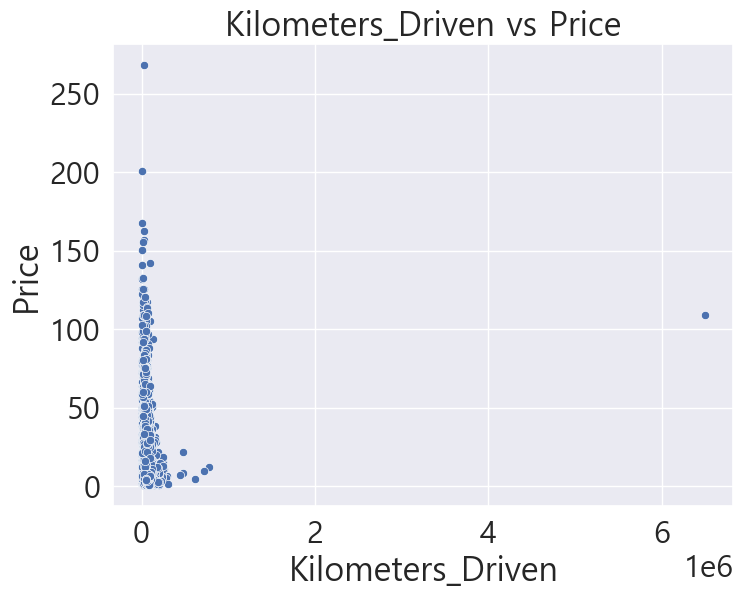

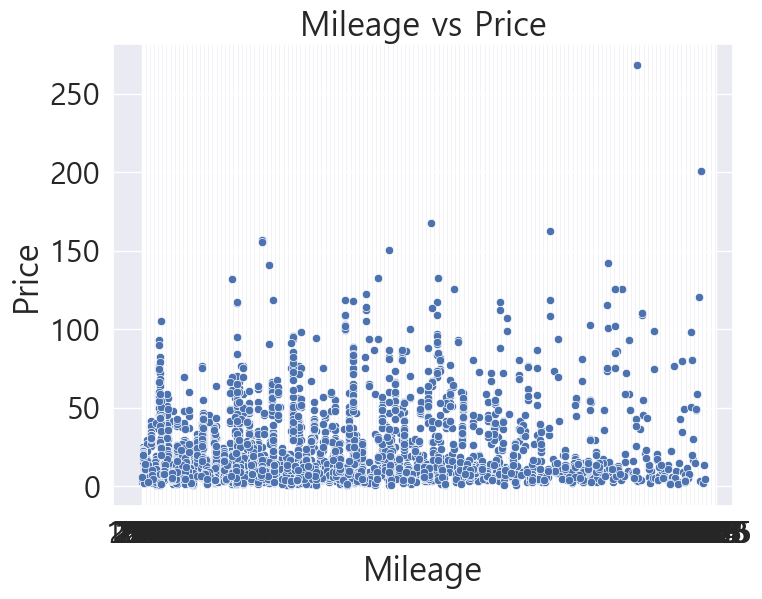

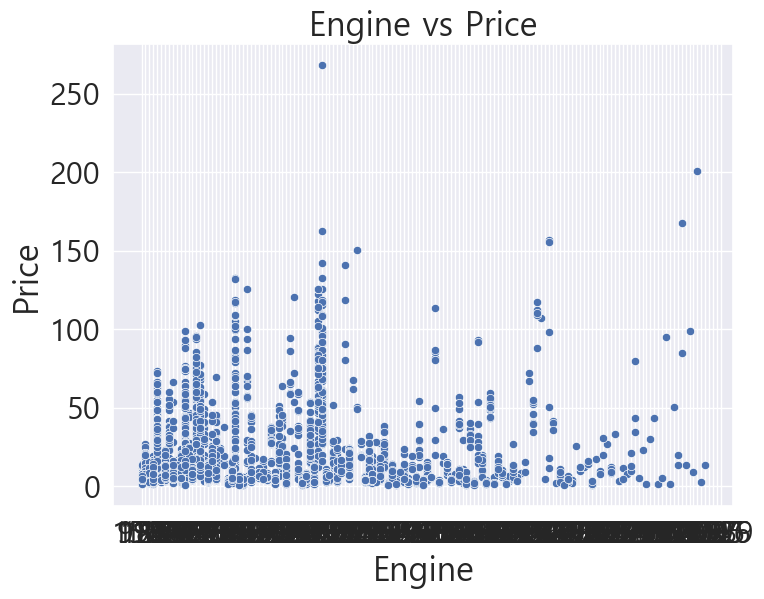

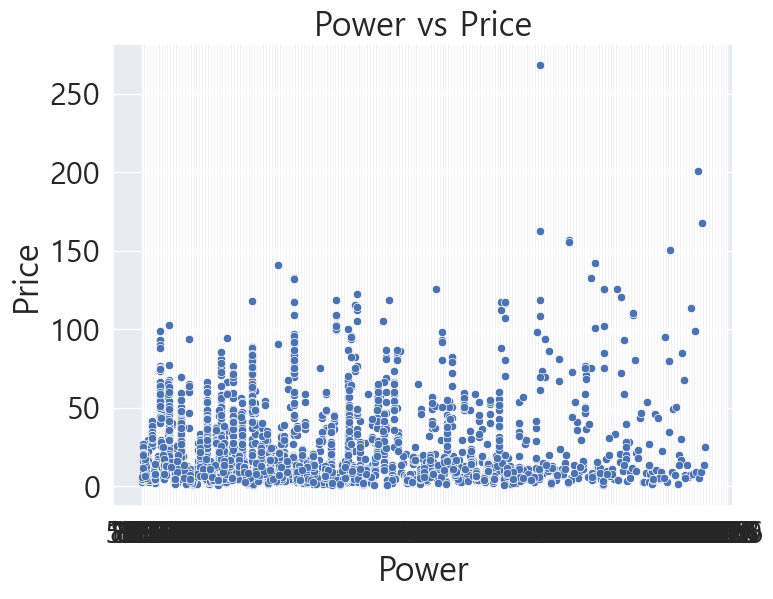

In [262]:
# 연속형 변수 리스트
continu_var = ['Kilometers_Driven','Mileage','Engine','Power']

# 연속형 변수와 가격 간의 관계 시각화 (산점도)
for var in continu_var:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=car_df, x=var, y='Price')
    plt.title(f'{var} vs Price')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.show()

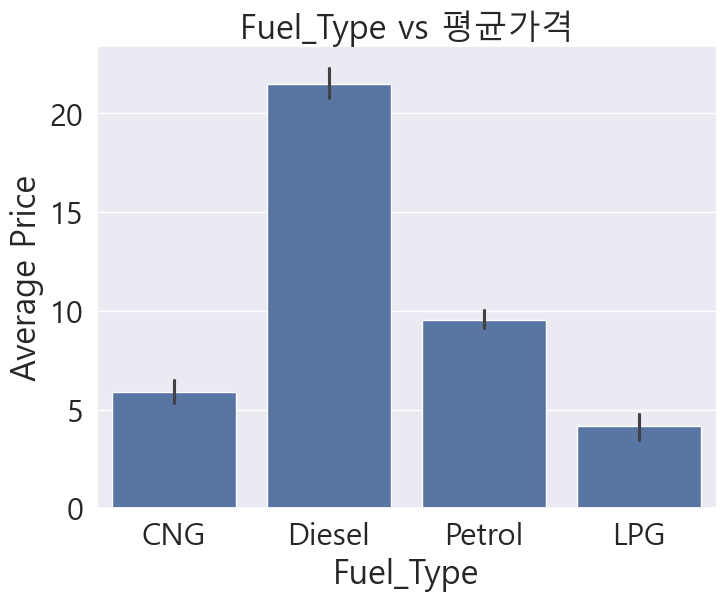

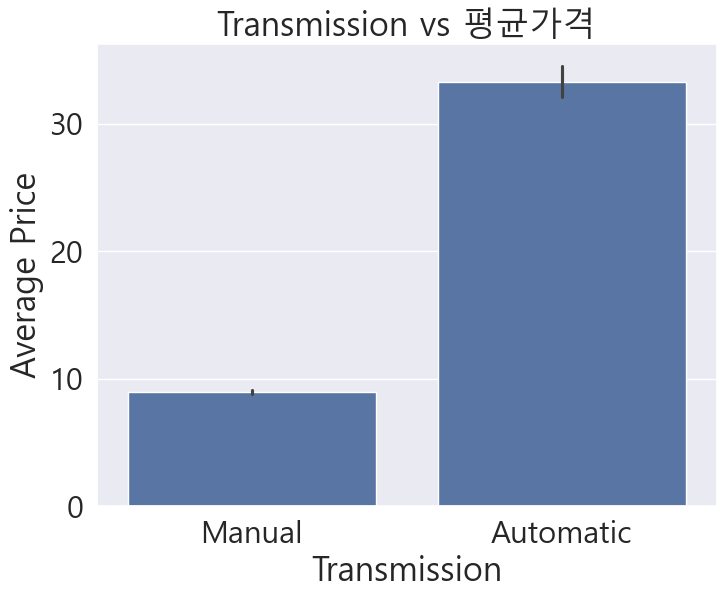

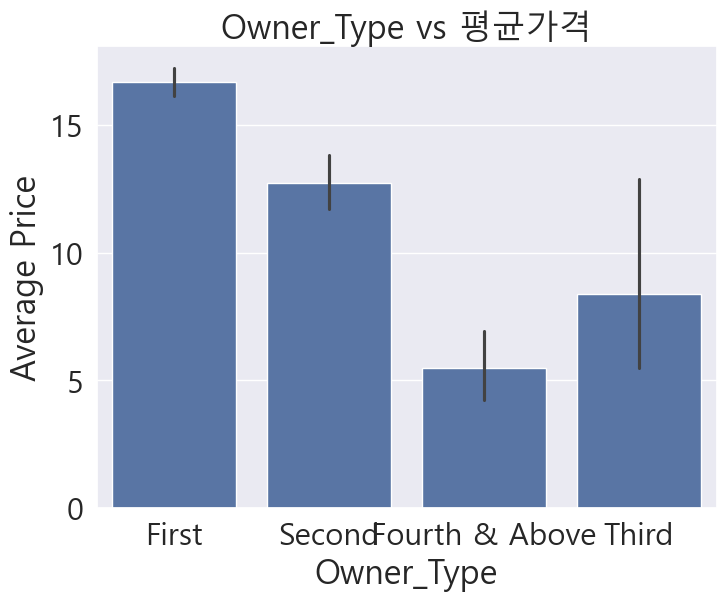

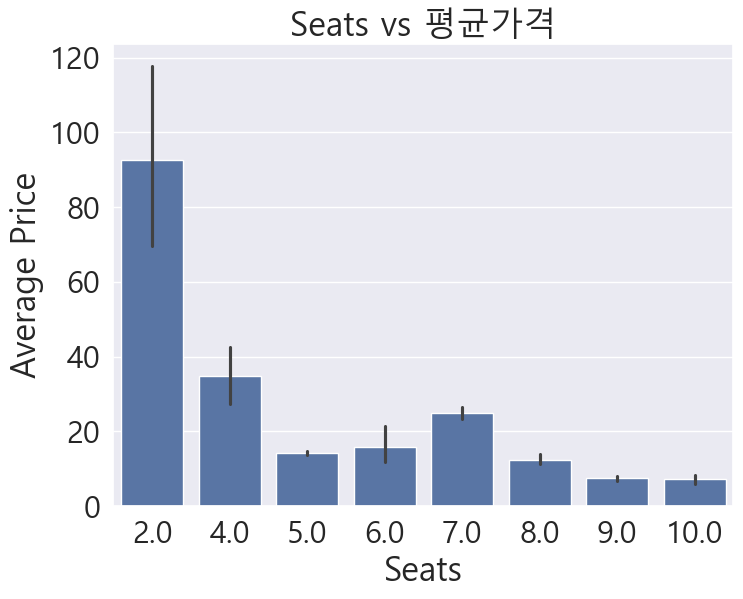

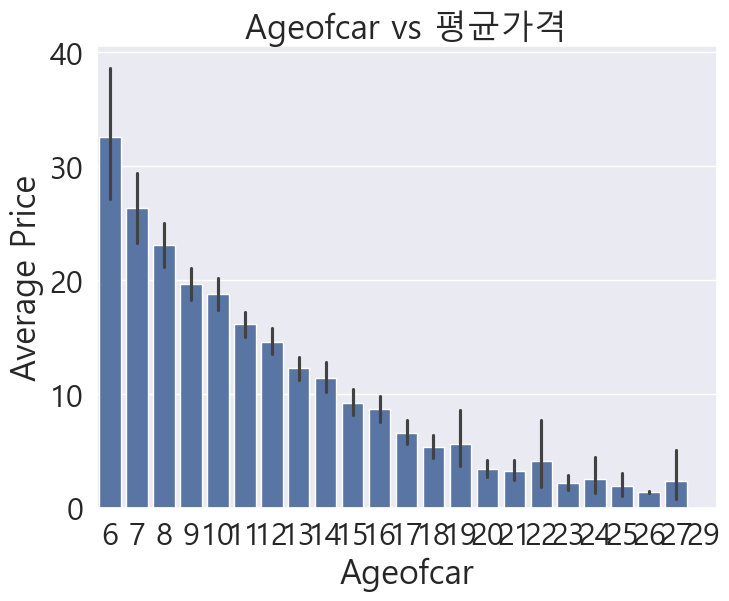

In [263]:
# 범주형 변수 리스트
Categorical_var = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Seats','Ageofcar']

# 범주형 변수와 가격 간의 관계 시각화 (바 그래프)
for var in Categorical_var:
    plt.figure(figsize=(8, 6))
    sns.barplot(data=car_df, x=var, y='Price')
    plt.title(f'{var} vs 평균가격')
    plt.xlabel(var)
    plt.ylabel('Average Price')
    plt.show()

# name 컬럼 처리

In [264]:
car_df.columns

Index(['Name', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price',
       'Ageofcar'],
      dtype='object')

In [265]:
car_df[car_df['Name'].isnull()]

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Ageofcar


In [266]:
car_df.dropna(subset=['Name'], inplace=True)

In [267]:
car_df['Brand'] = car_df['Name'].str.split(' ').str[0] #Separating Brand name from the Name
car_df['Model'] = car_df['Name'].str.split(' ').str[1] + car_df['Name'].str.split(' ').str[2]

In [268]:
car_df

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Ageofcar,Brand,Model
0,Maruti Wagon R LXI CNG,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,2.93125,15,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,20.93750,10,Hyundai,Creta1.6
2,Honda Jazz V,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,7.53750,14,Honda,JazzV
3,Maruti Ertiga VDI,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,10.05000,13,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,29.71450,12,Audi,A4New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,Volkswagen Vento Diesel Trendline,2011,89411,Diesel,Manual,First,20.54,1598,103.6,5.0,NaN,14,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,2015,59000,Petrol,Automatic,First,17.21,1197,103.6,5.0,NaN,10,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,2012,28000,Diesel,Manual,First,23.08,1461,63.1,5.0,NaN,13,Nissan,MicraDiesel
7251,Volkswagen Polo GT TSI,2013,52262,Petrol,Automatic,Third,17.2,1197,103.6,5.0,NaN,12,Volkswagen,PoloGT


In [269]:
car_df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [270]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7251 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7251 non-null   object 
 1   Year               7251 non-null   int64  
 2   Kilometers_Driven  7251 non-null   int64  
 3   Fuel_Type          7251 non-null   object 
 4   Transmission       7251 non-null   object 
 5   Owner_Type         7251 non-null   object 
 6   Mileage            7251 non-null   object 
 7   Engine             7205 non-null   object 
 8   Power              7076 non-null   object 
 9   Seats              7251 non-null   float64
 10  Price              6017 non-null   float64
 11  Ageofcar           7251 non-null   int64  
 12  Brand              7251 non-null   object 
 13  Model              7250 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 849.7+ KB


In [271]:
# 결측값을 평균값으로 대체
# 열 데이터 타입 확인 및 수치형으로 변환
car_df['Power'] = pd.to_numeric(car_df['Power'], errors='coerce')  # 'coerce'는 변환 불가능한 값을 NaN으로 처리
car_df['Engine'] = pd.to_numeric(car_df['Engine'], errors='coerce')

# 결측값을 평균값으로 대체
car_df['Power'] = car_df['Power'].fillna(car_df['Power'].mean())
car_df['Engine'] = car_df['Engine'].fillna(car_df['Engine'].mean())

In [272]:
#car_df.isnull().sum()
car_df[car_df['Model'].isna()]

,Name,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Ageofcar,Brand,Model
7067,OpelCorsa 1.4Gsi,2005,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,20,OpelCorsa,NaN


In [273]:
car_df = car_df.drop(car_df[car_df['Model'].isna()].index)

In [274]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7250 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7250 non-null   object 
 1   Year               7250 non-null   int64  
 2   Kilometers_Driven  7250 non-null   int64  
 3   Fuel_Type          7250 non-null   object 
 4   Transmission       7250 non-null   object 
 5   Owner_Type         7250 non-null   object 
 6   Mileage            7250 non-null   object 
 7   Engine             7250 non-null   float64
 8   Power              7250 non-null   float64
 9   Seats              7250 non-null   float64
 10  Price              6017 non-null   float64
 11  Ageofcar           7250 non-null   int64  
 12  Brand              7250 non-null   object 
 13  Model              7250 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 849.6+ KB


In [275]:
# 가격(Price) 열에서 결측값이 있는 행 삭제
car_df = car_df.dropna(subset=['Price'])

In [276]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6017 non-null   object 
 1   Year               6017 non-null   int64  
 2   Kilometers_Driven  6017 non-null   int64  
 3   Fuel_Type          6017 non-null   object 
 4   Transmission       6017 non-null   object 
 5   Owner_Type         6017 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             6017 non-null   float64
 8   Power              6017 non-null   float64
 9   Seats              6017 non-null   float64
 10  Price              6017 non-null   float64
 11  Ageofcar           6017 non-null   int64  
 12  Brand              6017 non-null   object 
 13  Model              6017 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 705.1+ KB


In [277]:
car_df.isna().sum()

Name                 0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Ageofcar             0
Brand                0
Model                0
dtype: int64

In [278]:
# 문자열 'NaN'이 있는지 확인
nan_string_count = (car_df == 'NaN').sum()
print(nan_string_count)

Name                 0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Ageofcar             0
Brand                0
Model                0
dtype: int64


In [279]:
for col in car_df.columns:
	print(f'컬럼 고유값 {col} : {car_df[col].unique()}')

컬럼 고유값 Name : ['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']
컬럼 고유값 Year : [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]
컬럼 고유값 Kilometers_Driven : [72000 41000 46000 ... 45004 70602 27365]
컬럼 고유값 Fuel_Type : ['CNG' 'Diesel' 'Petrol' 'LPG']
컬럼 고유값 Transmission : ['Manual' 'Automatic']
컬럼 고유값 Owner_Type : ['First' 'Second' 'Fourth & Above' 'Third']
컬럼 고유값 Mileage : ['26.6' '19.67' '18.2' '20.77' '15.2' '21.1' '23.08' '11.36' '20.54'
 '22.3' '21.56' '16.8' '25.2' '12.7' '0.0' '13.5' '25.8' '28.4' '20.45'
 '14.84' '22.69' '23.65' '13.53' '18.5' '14.4' '20.92' '17.5' '12.8'
 '19.01' '14.53' '11.18' '12.4' '16.09' '14.0' '24.3' '18.15' '11.74'
 '22.07' '19.7' '25.4' '25.32' '14.62' '14.28' '14.9' '11.25' '24.4'
 '16.55' '17.11' '22.9' '17.8' '18.9' '15.04' '25.17' '20.36' '13.29'
 '13.68' '20.0' '1

In [280]:
#converting object data type to category data type
car_df["Fuel_Type"] = car_df["Fuel_Type"].astype("category")
car_df["Transmission"] = car_df["Transmission"].astype("category")
car_df["Owner_Type"] = car_df["Owner_Type"].astype("category")
car_df["Brand"] = car_df["Brand"].astype("category")
car_df["Model"] = car_df["Model"].astype("category")

#converting datatype  
car_df["Mileage"] = car_df["Mileage"].astype(float)
car_df["Power"] = car_df["Power"].astype(float)
car_df["Engine"]=car_df["Engine"].astype(float)

In [281]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6017 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               6017 non-null   object  
 1   Year               6017 non-null   int64   
 2   Kilometers_Driven  6017 non-null   int64   
 3   Fuel_Type          6017 non-null   category
 4   Transmission       6017 non-null   category
 5   Owner_Type         6017 non-null   category
 6   Mileage            6017 non-null   float64 
 7   Engine             6017 non-null   float64 
 8   Power              6017 non-null   float64 
 9   Seats              6017 non-null   float64 
 10  Price              6017 non-null   float64 
 11  Ageofcar           6017 non-null   int64   
 12  Brand              6017 non-null   category
 13  Model              6017 non-null   category
dtypes: category(5), float64(5), int64(3), object(1)
memory usage: 528.7+ KB


In [282]:
for col in car_df.columns:
	print(f'컬럼 고유값 {col} : {car_df[col].unique()}')

컬럼 고유값 Name : ['Maruti Wagon R LXI CNG' 'Hyundai Creta 1.6 CRDi SX Option'
 'Honda Jazz V' ... 'Volkswagen Polo IPL II 1.2 Petrol Highline'
 'Tata Bolt Revotron XT' 'Mahindra Xylo D4 BSIV']
컬럼 고유값 Year : [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]
컬럼 고유값 Kilometers_Driven : [72000 41000 46000 ... 45004 70602 27365]
컬럼 고유값 Fuel_Type : ['CNG', 'Diesel', 'Petrol', 'LPG']
Categories (4, object): ['CNG', 'Diesel', 'LPG', 'Petrol']
컬럼 고유값 Transmission : ['Manual', 'Automatic']
Categories (2, object): ['Automatic', 'Manual']
컬럼 고유값 Owner_Type : ['First', 'Second', 'Fourth & Above', 'Third']
Categories (4, object): ['First', 'Fourth & Above', 'Second', 'Third']
컬럼 고유값 Mileage : [26.6  19.67 18.2  20.77 15.2  21.1  23.08 11.36 20.54 22.3  21.56 16.8
 25.2  12.7   0.   13.5  25.8  28.4  20.45 14.84 22.69 23.65 13.53 18.5
 14.4  20.92 17.5  12.8  19.01 14.53 11.18 12.4  16.09 14.   24.3  18.15
 11.74 22.07 19.7  25.4  25.32 14.6

# 1 차 전처리 

In [283]:
car_df['Car_size'] = np.where(car_df['Engine'] < 1200, 1,   # 경차
                      np.where(car_df['Engine'] < 1500, 2,  # 소형차
                      np.where(car_df['Engine'] < 2000, 3,  # 중형차
                                               4)))

In [284]:
car_df.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ageofcar,Car_size
count,6017.000000,6.017000e+03,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000,6017.000000
mean,2013.358152,5.874228e+04,18.134961,1621.477556,113.260528,5.277713,15.876219,11.641848,2.291840
std,3.269967,9.128375e+04,4.582289,599.316487,53.229236,0.803597,18.742589,3.269967,1.106341
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.737000,6.000000,1.000000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,5.862500,9.000000,1.000000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,98.600000,5.000000,9.447000,11.000000,2.000000
75%,2016.000000,7.300000e+04,21.100000,1969.000000,138.030000,5.000000,16.666250,14.000000,3.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,268.000000,27.000000,4.000000


# 범주형 데이터 처리

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


# 범주형 
categorical_cols = ['Fuel_Type', 'Transmission', 'Owner_Type', 'Brand','Model']
# 연속형
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Ageofcar']

# 원핫 인코더 생성

encoder = OneHotEncoder(drop='first',sparse_output=False, handle_unknown='ignore')

# 원-핫 인코딩 적용
encoded_array = encoder.fit_transform(car_df[categorical_cols])

print(encoded_array)

# 원-핫 인코딩된 컬럼명 가져오기
encoded_columns = encoder.get_feature_names_out(categorical_cols)

print(encoded_columns)


# DataFrame 변환
df_encoded = pd.DataFrame(encoded_array, columns=encoded_columns)


# 기존 수치형 데이터와 결합
df_final = pd.concat([car_df.drop(columns=categorical_cols), df_encoded], axis=1)

print(df_final)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
['Fuel_Type_Diesel' 'Fuel_Type_LPG' 'Fuel_Type_Petrol'
 'Transmission_Manual' 'Owner_Type_Fourth & Above' 'Owner_Type_Second'
 'Owner_Type_Third' 'Brand_Audi' 'Brand_BMW' 'Brand_Bentley'
 'Brand_Chevrolet' 'Brand_Datsun' 'Brand_Fiat' 'Brand_Force' 'Brand_Ford'
 'Brand_Honda' 'Brand_Hyundai' 'Brand_ISUZU' 'Brand_Isuzu' 'Brand_Jaguar'
 'Brand_Jeep' 'Brand_Lamborghini' 'Brand_Land' 'Brand_Mahindra'
 'Brand_Maruti' 'Brand_Mercedes-Benz' 'Brand_Mini' 'Brand_Mitsubishi'
 'Brand_Nissan' 'Brand_Porsche' 'Brand_Renault' 'Brand_Skoda'
 'Brand_Smart' 'Brand_Tata' 'Brand_Toyota' 'Brand_Volkswagen'
 'Brand_Volvo' 'Model_1Series' 'Model_3Series' 'Model_5Series'
 'Model_6Series' 'Model_7Series' 'Model_800AC' 'Model_800DX'
 'Model_800Std' 'Model_A-StarAT' 'Model_A-StarLxi' 'Model_A-StarVxi'
 'Model_A335' 'Model_A41.8' 'Model_A42.0' 'Model_A43.0' 'M

In [286]:
df_final.dropna(inplace=True)

In [287]:
df_final.isnull().sum

<bound method DataFrame.sum of        Name   Year  Kilometers_Driven  Mileage  Engine  Power  Seats  Price  \
0     False  False              False    False   False  False  False  False   
1     False  False              False    False   False  False  False  False   
2     False  False              False    False   False  False  False  False   
3     False  False              False    False   False  False  False  False   
4     False  False              False    False   False  False  False  False   
...     ...    ...                ...      ...     ...    ...    ...    ...   
6012  False  False              False    False   False  False  False  False   
6013  False  False              False    False   False  False  False  False   
6014  False  False              False    False   False  False  False  False   
6015  False  False              False    False   False  False  False  False   
6016  False  False              False    False   False  False  False  False   

      Ageofcar  Car_

In [288]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6015 entries, 0 to 6016
Columns: 733 entries, Name to Model_redi-GOT
dtypes: float64(732), object(1)
memory usage: 33.7+ MB


In [289]:
df_final.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ageofcar,Car_size,Fuel_Type_Diesel,...,Model_i201.4,Model_i202015-2017,Model_i20Active,Model_i20Asta,Model_i20Diesel,Model_i20Era,Model_i20Magna,Model_i20Sportz,Model_redi-GOS,Model_redi-GOT
count,6015.000000,6.015000e+03,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,...,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000,6015.000000
mean,2013.358603,5.874635e+04,18.133619,1621.695171,113.277456,5.277805,15.880064,11.641397,2.292269,0.532668,...,0.004821,0.001663,0.001829,0.007814,0.000166,0.000166,0.006151,0.007814,0.000166,0.000831
std,3.270366,9.129865e+04,4.582072,599.296992,53.229917,0.803715,18.744518,3.270366,1.106274,0.498973,...,0.069274,0.040743,0.042728,0.088057,0.012894,0.012894,0.078195,0.088057,0.012894,0.028822
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.737000,6.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,78.000000,5.000000,5.862500,9.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,5.300000e+04,18.150000,1495.000000,98.600000,5.000000,9.447000,11.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,7.300000e+04,21.100000,1973.500000,138.030000,5.000000,16.666250,14.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,268.000000,27.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

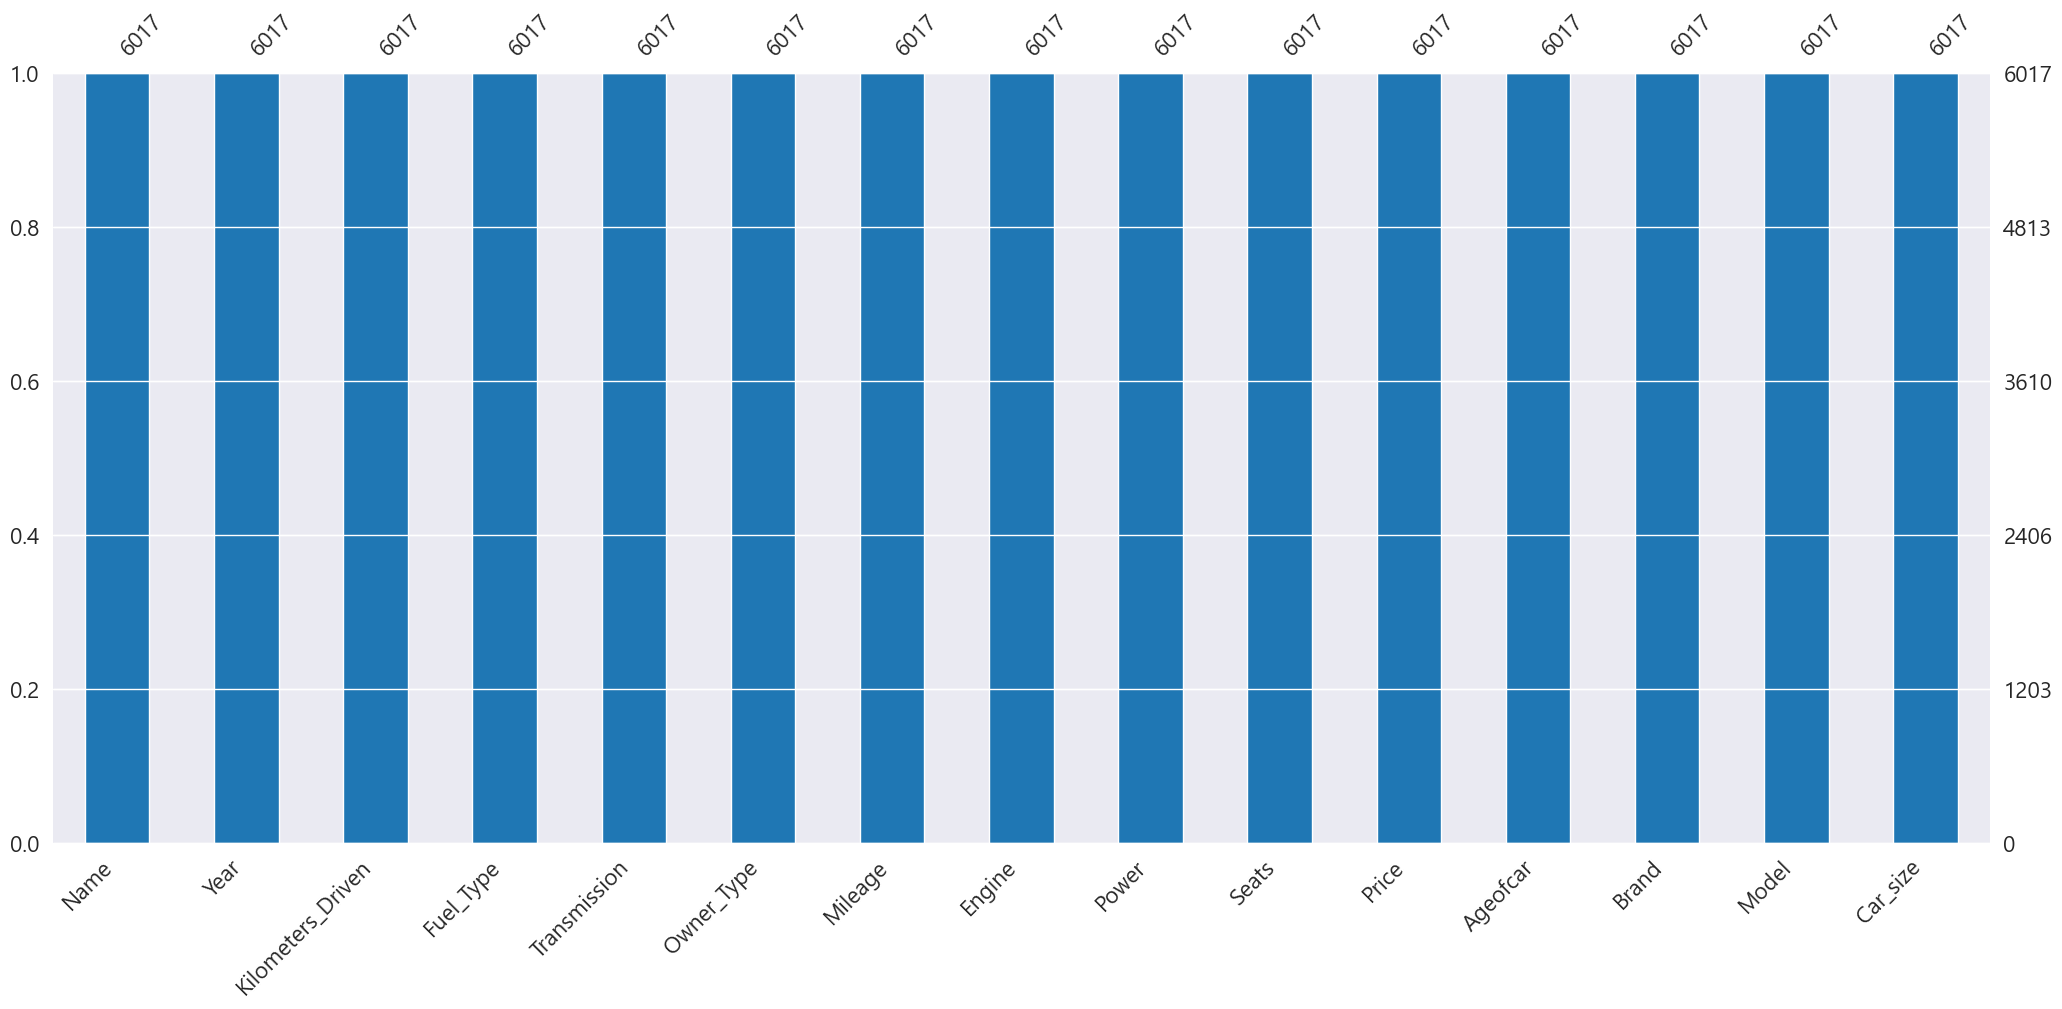

In [290]:
# 각각의 컬럼 결측치 시각화
msno.bar(car_df,color='#1f77b4')

In [291]:
df_final.columns

Index(['Name', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Ageofcar', 'Car_size',
       ...
       'Model_i201.4', 'Model_i202015-2017', 'Model_i20Active',
       'Model_i20Asta', 'Model_i20Diesel', 'Model_i20Era', 'Model_i20Magna',
       'Model_i20Sportz', 'Model_redi-GOS', 'Model_redi-GOT'],
      dtype='object', length=733)

In [292]:
targetSR = df_final['Price']
featureDF  = df_final.drop(columns=['Name','Price'] )
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=156)


lr_model = LinearRegression()
print(X_train.shape) 
print(X_train.ndim) 
print(y_train.shape)
print(y_train.ndim)

lr_model.fit(X_train, y_train)



(4812, 731)
2
(4812,)
1


LinearRegression()

In [293]:
y_pred = lr_model.predict(X_test)

In [ ]:
first_model =  lr_model.score(X_test,y_test)
print(f' 1차 전처리 모델 {first_model}')
# 모델 평가
train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred )
rmse = root_mean_squared_error(y_test, y_pred )
r2 = r2_score(y_test, y_pred )

print(f"Train R^2 Score: {train_score}")
print(f"Test R^2 Score: {test_score}")
print(f"R^2 Score: {r2}")

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


 1차 전처리 모델 0.6956687448268735
Train R^2 Score: 0.8362486613367243
Test R^2 Score: 0.6956687448268735
MSE: 621.6491604992278
R^2 Score: -0.6532772181212194


In [295]:
featureDF.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Ageofcar', 'Car_size', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       ...
       'Model_i201.4', 'Model_i202015-2017', 'Model_i20Active',
       'Model_i20Asta', 'Model_i20Diesel', 'Model_i20Era', 'Model_i20Magna',
       'Model_i20Sportz', 'Model_redi-GOS', 'Model_redi-GOT'],
      dtype='object', length=731)

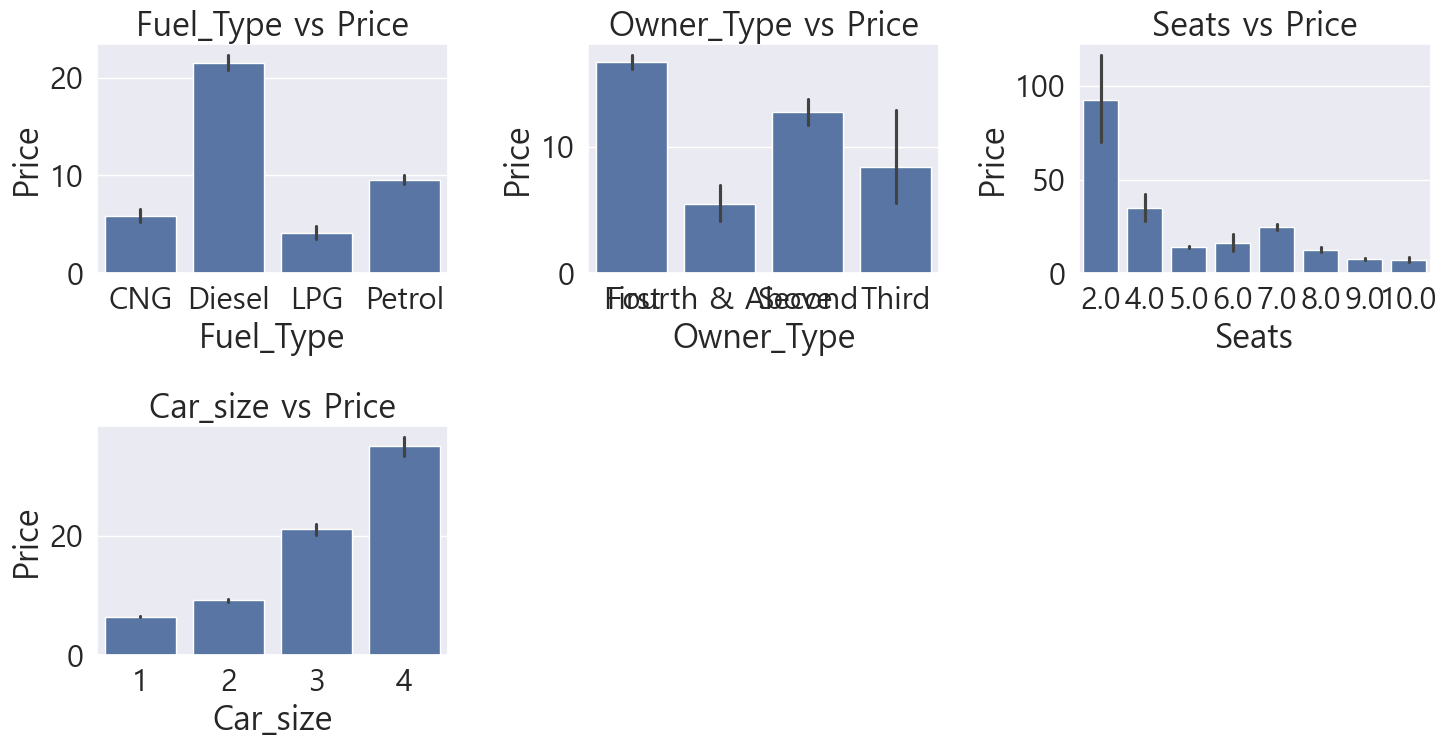

In [296]:
# 범주형 컬럼
categorical_cols = ['Fuel_Type', 'Owner_Type', 'Seats','Car_size']

# 범주형 데이터와 가격의 관계를 바 그래프로 시각화
plt.figure(figsize=(15, 8))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  # 2x3 격자에서 서브플롯 배치
    sns.barplot(x=col, y='Price', data=car_df)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

- 2인승 차량이 더 비싸다.
- 디젤 연료 차량이 다른 연료 타입보다 더 비싸다.
- 자동 변속기 차량이 수동 변속기 차량보다 가격이 높다.
- 소유자가 많을수록 차량 가격이 낮아진다.

C:\Users\KDT17\AppData\Local\Temp\ipykernel_3564\1968921217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brand', y='Price', data=car_df, palette='coolwarm')


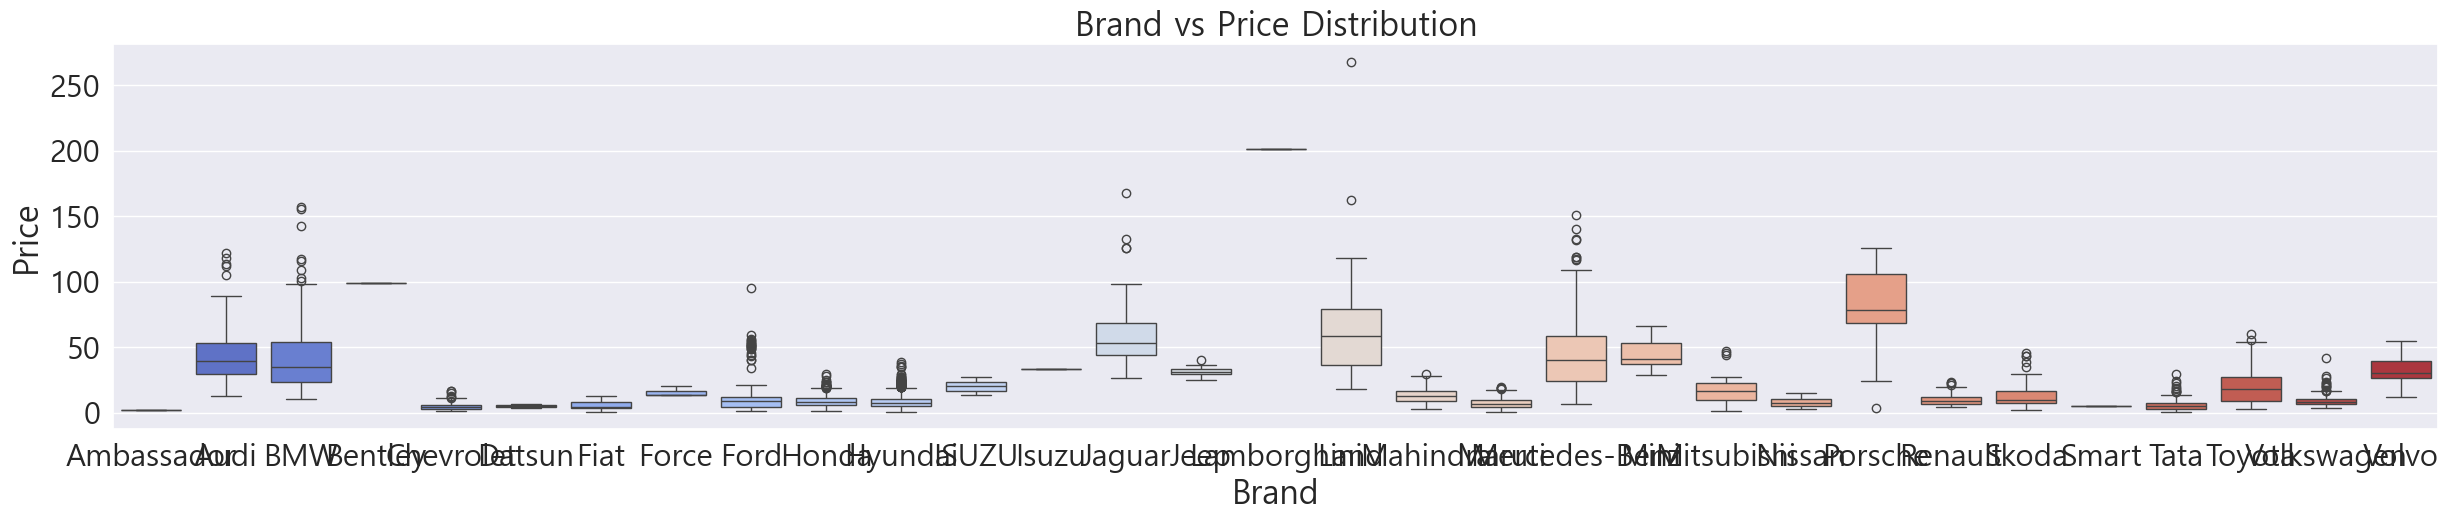

In [ ]:
# # 브랜드와 price 의 상관관계
# plt.figure(figsize=(30, 5))
# sns.boxplot(x='Brand', y='Price', data=car_df, palette='coolwarm')

# plt.xlabel('Brand')
# plt.ylabel('Price')
# plt.title('Brand vs Price Distribution')
# plt.show()

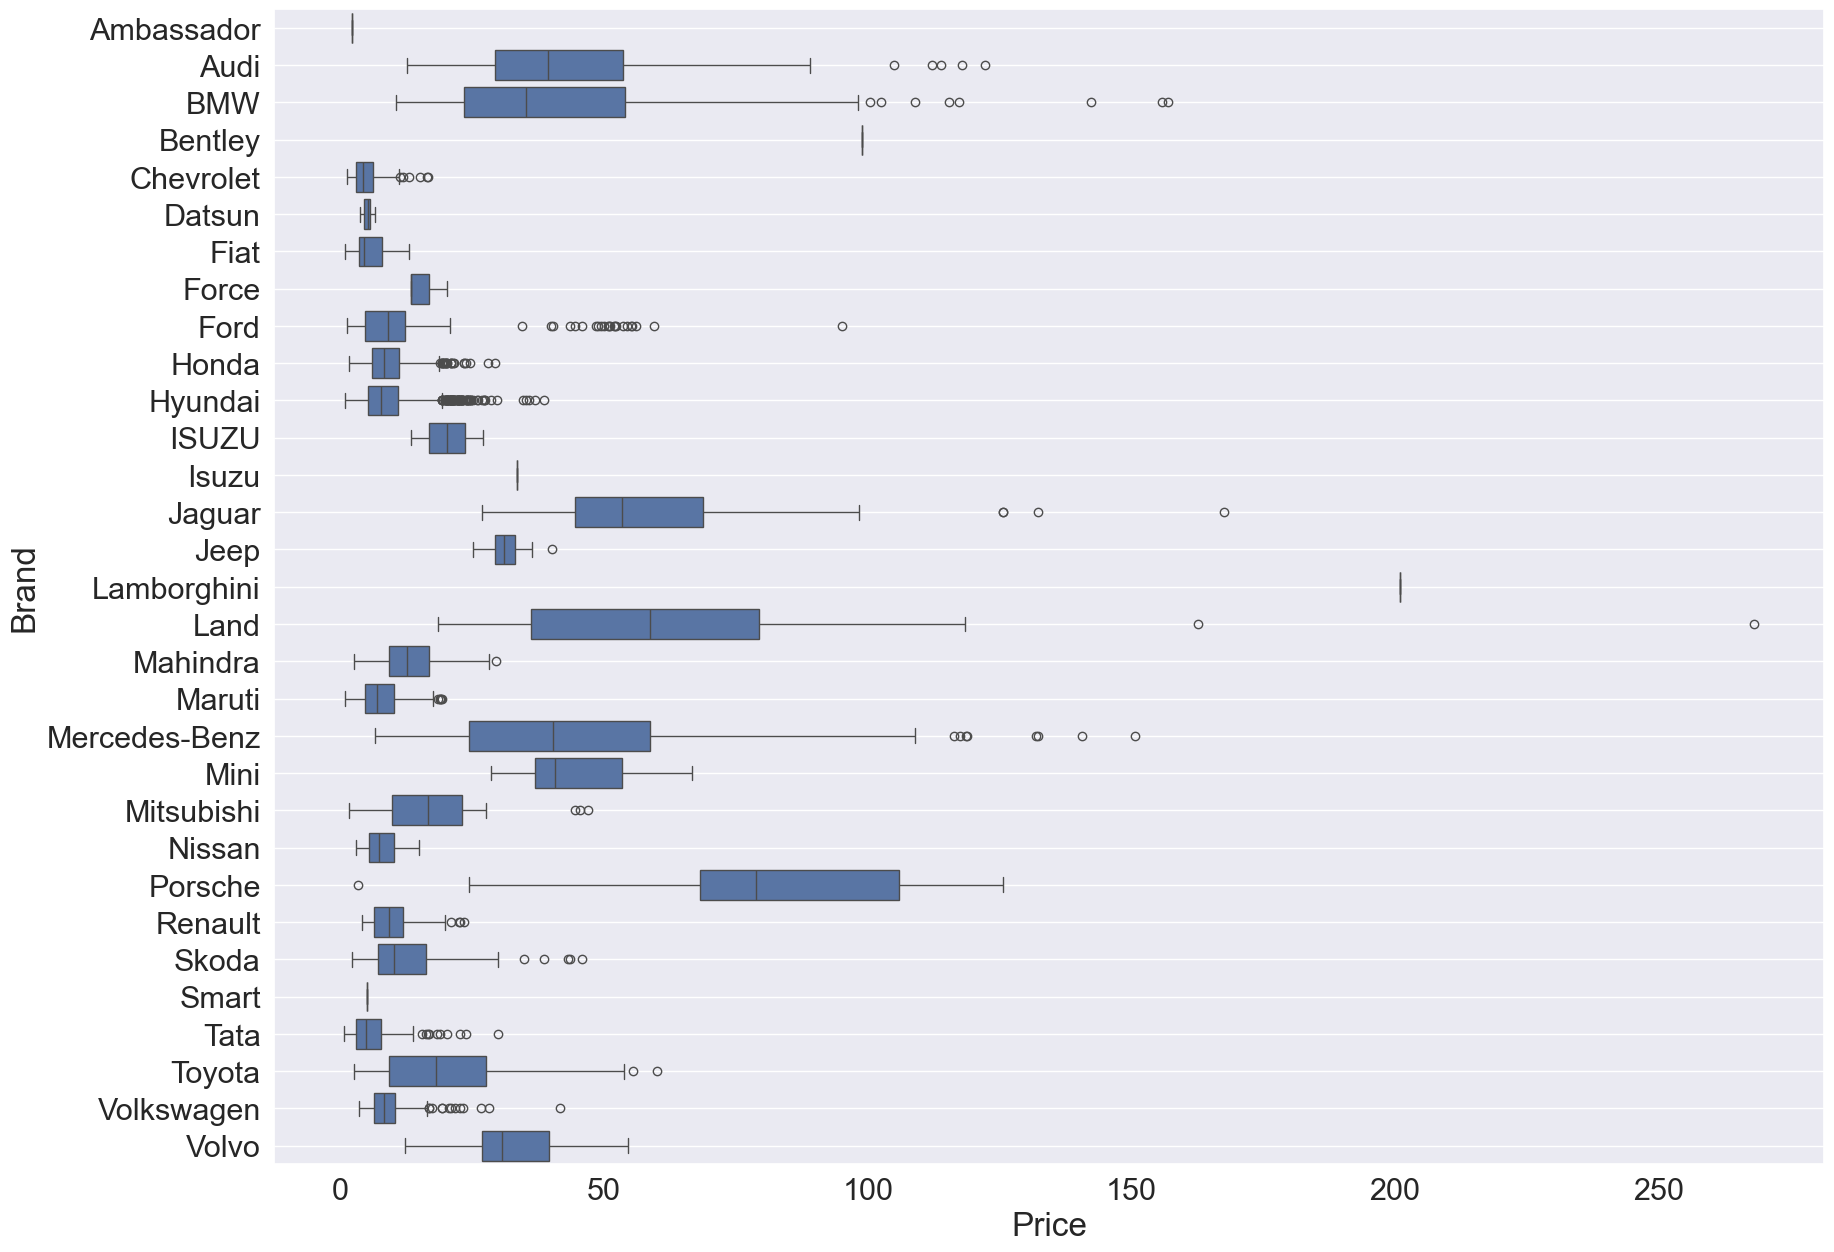

In [ ]:
# plt.figure(figsize=(20,15))
# sns.set(font_scale=2)
# sns.boxplot(x='Price', y='Brand', data=car_df)
# plt.grid()

C:\Users\KDT17\AppData\Local\Temp\ipykernel_3564\2507072536.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  brand_avg_price = car_df.groupby('Brand')['Price'].mean().reset_index()
C:\Users\KDT17\AppData\Local\Temp\ipykernel_3564\2507072536.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Brand', y='Price', data=brand_avg_price, palette='coolwarm')
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\IPython\core\pylabtools.py:15

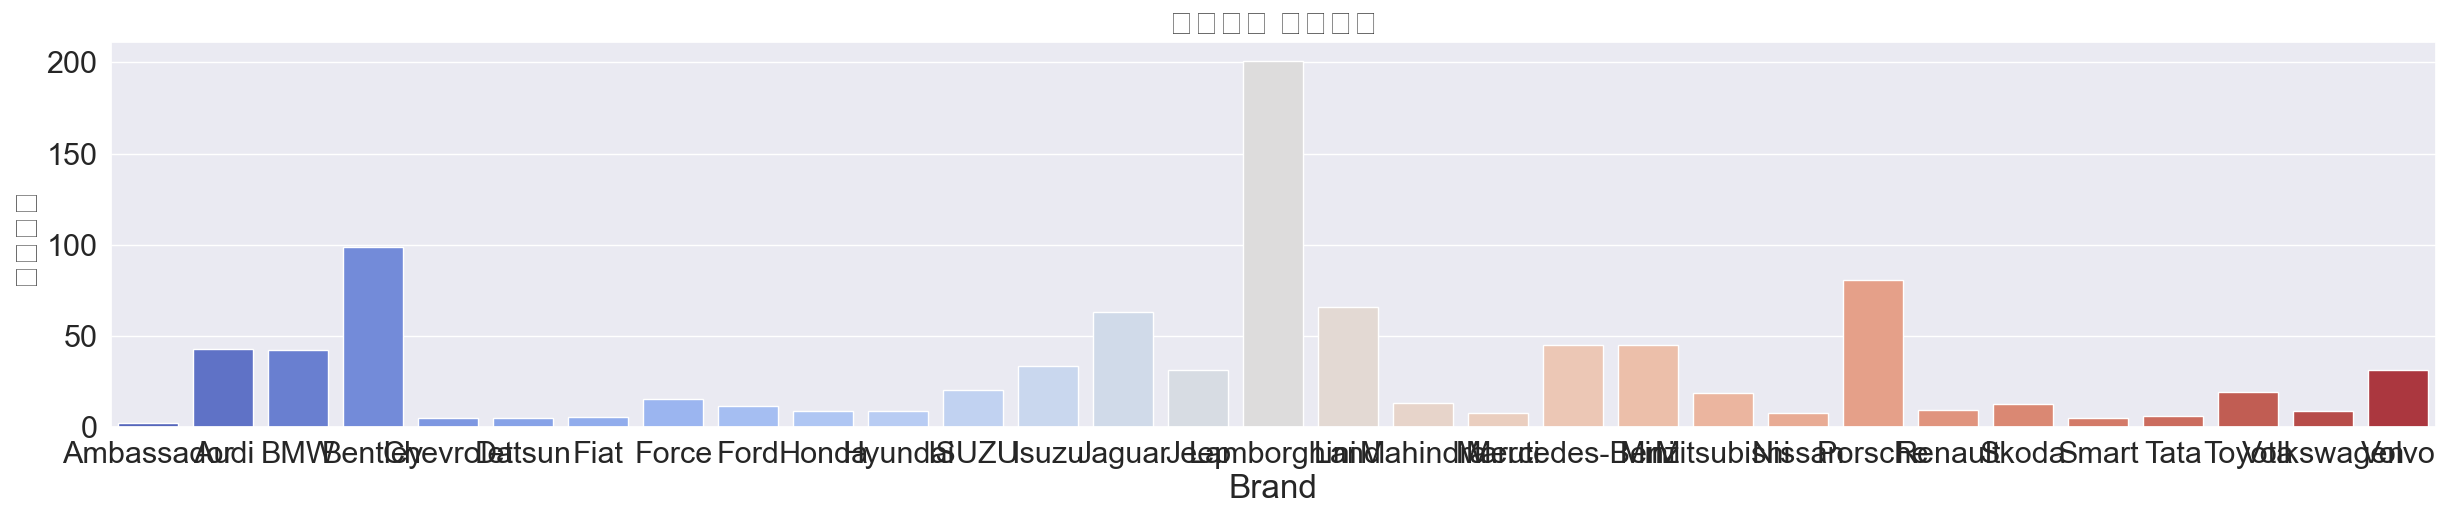

In [ ]:
# # 브랜드별 평균 가격 계산
# brand_avg_price = car_df.groupby('Brand')['Price'].mean().reset_index()

# #  막대 그래프 시각화
# plt.figure(figsize=(30, 5))
# sns.barplot(x='Brand', y='Price', data=brand_avg_price, palette='coolwarm')

# plt.xlabel('Brand')
# plt.ylabel('평균가격')
# plt.title('브랜드별 평균가격')
# plt.show()

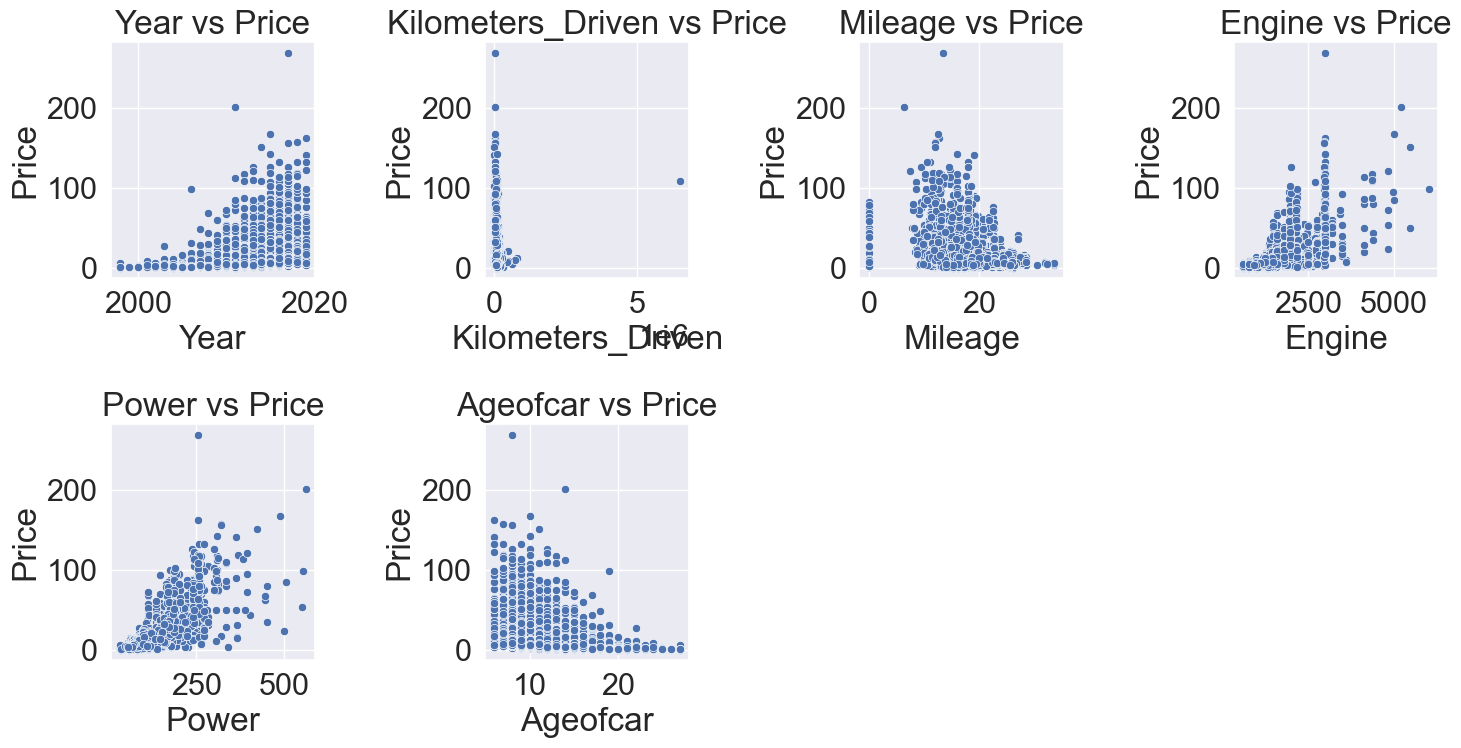

In [300]:
# 연속형 컬럼
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Ageofcar']

# 연속형 데이터와 가격의 관계를 산점도로 시각화
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)  # 2x4 격자에서 서브플롯 배치
    sns.scatterplot(x=col, y='Price', data=car_df)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()



- 예상대로, 오래된 모델은 최신 모델보다 저렴하게 판매된다.
- 엔진 배기량이 클수록 차량 가격이 높다.
- 생산년도가 짧을수록 가격이 높다.

In [301]:
car_df['Kilometers_Driven'].sort_values(ascending = False)

2328    6500000
340      775000
1860     720000
358      620000
2823     480000
         ...   
1198       1000
173        1000
1161       1000
5606        600
1361        171
Name: Kilometers_Driven, Length: 6017, dtype: int64

In [302]:
car_df.loc[car_df['Kilometers_Driven'] == 6500000, 'Kilometers_Driven'] = car_df['Kilometers_Driven'].mean()

C:\Users\KDT17\AppData\Local\Temp\ipykernel_3564\741262937.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '58742.282034236334' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  car_df.loc[car_df['Kilometers_Driven'] == 6500000, 'Kilometers_Driven'] = car_df['Kilometers_Driven'].mean()


Text(0.5, 1.0, 'Kilometers_Driven vs Price')

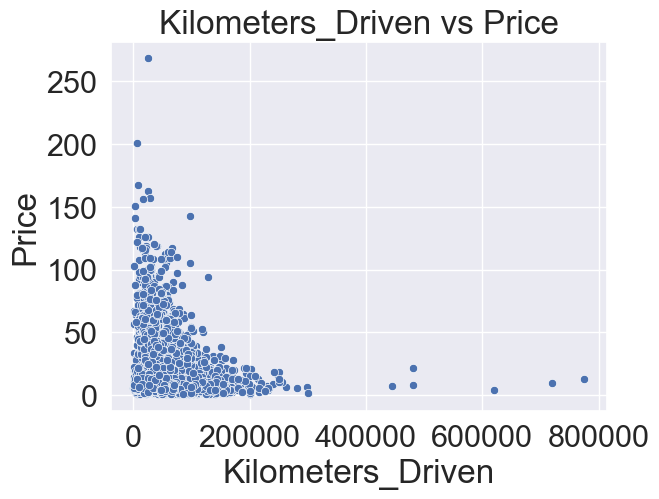

In [303]:
sns.scatterplot(x='Kilometers_Driven', y='Price', data=car_df)
plt.title(f'Kilometers_Driven vs Price')

In [304]:
car_df['Kilometers_Driven']

0        72000.0
1        41000.0
2        46000.0
3        87000.0
4        40670.0
          ...   
6014     27365.0
6015    100000.0
6016     55000.0
6017     46000.0
6018     47000.0
Name: Kilometers_Driven, Length: 6017, dtype: float64

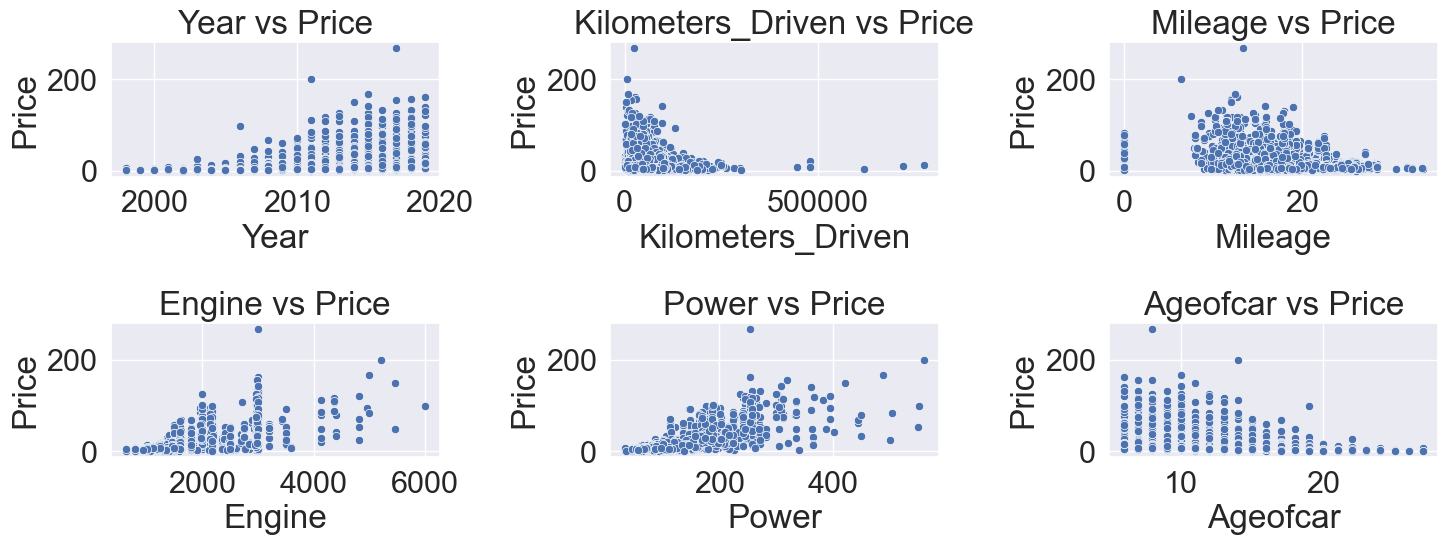

In [305]:
# 연속형 컬럼
numerical_cols = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Ageofcar']

# 연속형 데이터와 가격의 관계를 산점도로 시각화
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # 2x4 격자에서 서브플롯 배치
    sns.scatterplot(x=col, y='Price', data=car_df)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()


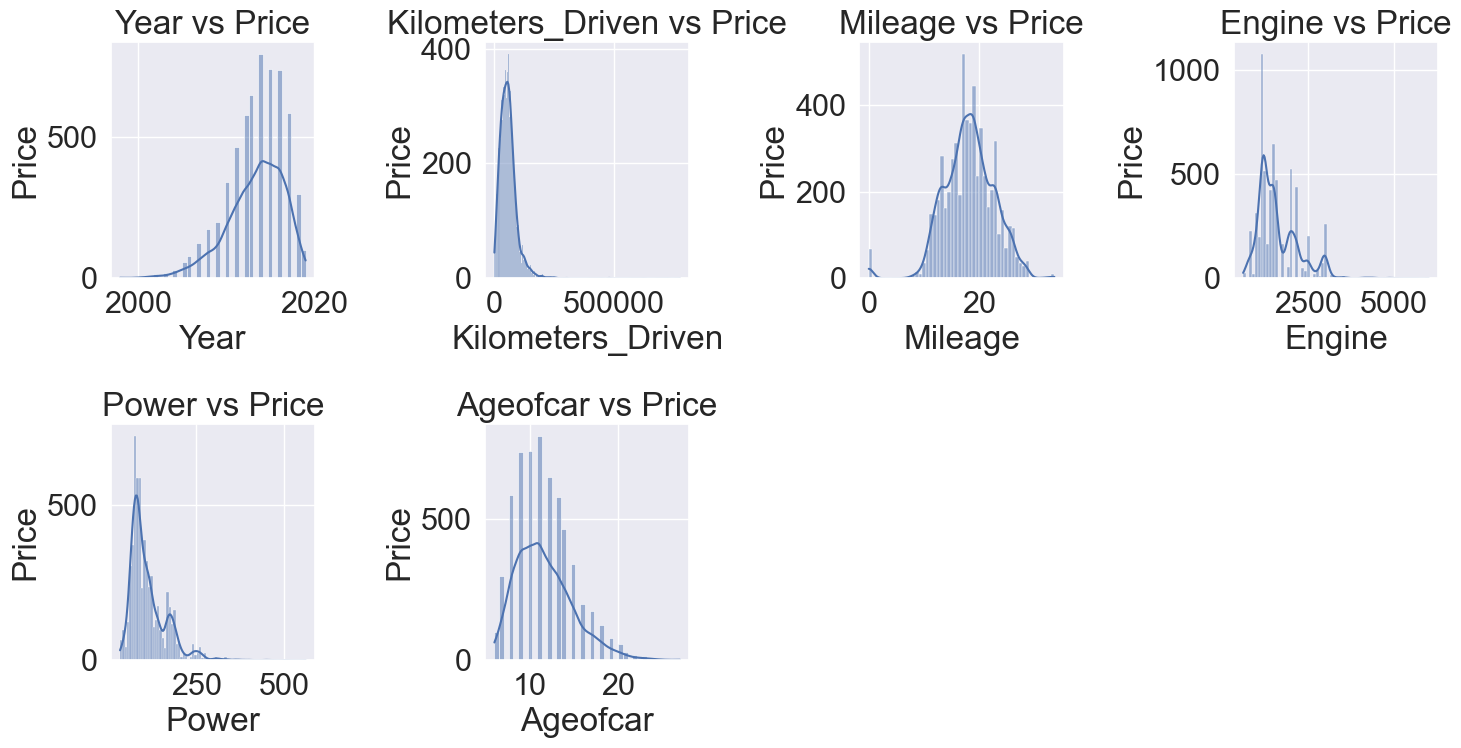

In [306]:
# 연속형 데이터와 가격의 관계를 산점도로 시각화
plt.figure(figsize=(15, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)  # 2x4 격자에서 서브플롯 배치
    sns.histplot(x=col,kde=True ,data=car_df)
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

# 정규화 

In [318]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Robust_scaler = RobustScaler()
# Robust_X_scaled = Robust_scaler.fit_transform(featureDF)

#min_max_scaler = MinMaxScaler()
#min_max_scaler_X = min_max_
stand_scaler= StandardScaler()

featureDF[numerical_cols] = stand_scaler.fit_transform(featureDF[numerical_cols])
# 2. 데이터 나누기 (학습용, 테스트용)
#X_train, X_test, y_train, y_test = train_test_split(Robust_X_scaled, targetSR, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(min_max_scaler_X, targetSR, test_size=0.2, random_state=42)

#3. 선형 회귀 모델 학습

lr_model.fit(X_train, y_train)

# 4. 예측 및 성능 평가 (선형 회귀)
y_pred_linear = lr_model.predict(X_test)

# # lr_model.predict(X_train,y_train)
lr_model.score(X_train,y_train)

# 모델 평가
train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred )
rmse = root_mean_squared_error(y_test, y_pred )
r2 = r2_score(y_test, y_pred )
print(f"정규화 선형회귀 ")
print(f"Train R^2 Score: {train_score}")
print(f"Test R^2 Score: {test_score}")
print(f"R^2 Score: {r2}")

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

정규화 선형회귀 
Train R^2 Score: 0.8210145341935107
Test R^2 Score: 0.7561215083807735
R^2 Score: -0.9348387487113323
MSE: 659.4295735390133
RMSE: 25.679360847556413


In [308]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

Robust_scaler = RobustScaler()
# Robust_X_scaled = Robust_scaler.fit_transform(featureDF)

#min_max_scaler = MinMaxScaler()
#min_max_scaler_X = min_max_
#stand_scaler= StandardScaler()

featureDF[numerical_cols] = Robust_scaler.fit_transform(featureDF[numerical_cols])
# 2. 데이터 나누기 (학습용, 테스트용)
#X_train, X_test, y_train, y_test = train_test_split(Robust_X_scaled, targetSR, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(min_max_scaler_X, targetSR, test_size=0.2, random_state=42)

#3. 선형 회귀 모델 학습

lr_model.fit(X_train, y_train)

# 4. 예측 및 성능 평가 (선형 회귀)
y_pred_linear = lr_model.predict(X_test)

# # lr_model.predict(X_train,y_train)
lr_model.score(X_train,y_train)


0.8210145341935107

In [309]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

Robust_scaler = RobustScaler()
# Robust_X_scaled = Robust_scaler.fit_transform(featureDF)

min_max_scaler = MinMaxScaler()

#stand_scaler= StandardScaler()

featureDF[numerical_cols] = min_max_scaler.fit_transform(featureDF[numerical_cols])
# 2. 데이터 나누기 (학습용, 테스트용)
#X_train, X_test, y_train, y_test = train_test_split(Robust_X_scaled, targetSR, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(min_max_scaler_X, targetSR, test_size=0.2, random_state=42)

#3. 선형 회귀 모델 학습

lr_model.fit(X_train, y_train)

# 4. 예측 및 성능 평가 (선형 회귀)
y_pred_linear = lr_model.predict(X_test)

# # lr_model.predict(X_train,y_train)
lr_model.score(X_train,y_train)


0.8210145341935107

# 연속형 데이터만 선형회귀

In [319]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Robust_scaler = RobustScaler()
# Robust_X_scaled = Robust_scaler.fit_transform(featureDF)

#min_max_scaler = MinMaxScaler()
#min_max_scaler_X = min_max_
stand_scaler= StandardScaler()

featureDF[numerical_cols] = stand_scaler.fit_transform(featureDF[numerical_cols])
X = featureDF[numerical_cols] 
y = targetSR
# 2. 데이터 나누기 (학습용, 테스트용)
#X_train, X_test, y_train, y_test = train_test_split(Robust_X_scaled, targetSR, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(min_max_scaler_X, targetSR, test_size=0.2, random_state=42)

#3. 선형 회귀 모델 학습

lr_model.fit(X_train, y_train)

# 4. 예측 및 성능 평가 (선형 회귀)
y_pred_linear = lr_model.predict(X_test)

# # lr_model.predict(X_train,y_train)
print(lr_model.score(X_train,y_train))
#print(r2_score(y_pred_linear))

# 모델 평가
train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred )
rmse = root_mean_squared_error(y_test, y_pred )
r2 = r2_score(y_test, y_pred )

print(f"연속형만 선형회귀")
print(f"Train R^2 Score: {train_score}")
print(f"Test R^2 Score: {test_score}")
print(f"R^2 Score: {r2}")

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


0.6748526617903232
연속형만 선형회귀
Train R^2 Score: 0.6748526617903232
Test R^2 Score: 0.6869125383123869
R^2 Score: -0.9348387487113323
MSE: 659.4295735390133
RMSE: 25.679360847556413


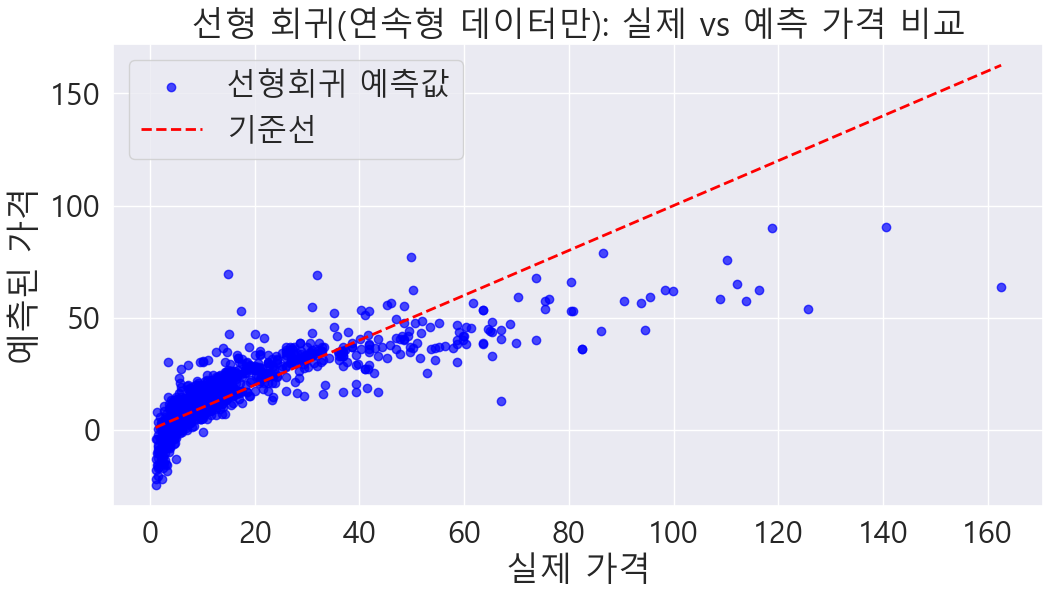

In [311]:
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.7, label="선형회귀 예측값")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed',label="기준선", linewidth=2)
plt.xlabel("실제 가격")
plt.ylabel("예측된 가격")
plt.title("선형 회귀(연속형 데이터만): 실제 vs 예측 가격 비교")
plt.legend()
plt.show()

In [312]:
from sklearn.ensemble import RandomForestRegressor

rf_model = rf = RandomForestRegressor(
    n_estimators=1000,  # 트리 개수 (기본값: 100)
    max_depth=8,  # 트리의 최대 깊이 (기본값: None, 완전 분기)
    min_samples_split=2,  # 노드를 나누는 최소 샘플 수 (기본값: 2)
    min_samples_leaf=2,  # 리프 노드가 가져야 할 최소 샘플 수 (기본값: 1)
    # max_features='auto',  # 노드 분할 시 고려할 특성 개수 (기본값: "auto")
    bootstrap=True,  # 부트스트랩 샘플링 사용 여부 (기본값: True)
    random_state=42,  # 랜덤 시드 고정 (재현 가능성)
    n_jobs=-1  # 모든 CPU 코어 사용 (병렬 처리)
)

rf_model.fit(X_train, y_train)

# 예측 및 평가
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

print("Random Forest train R² Score:", r2_score(y_train, y_train_pred))        
print("Random Forest test  R² Score:", r2_score(y_test, y_test_pred))        
print(f"Random Forest train_loss : {root_mean_squared_error(y_train, y_train_pred)}")
print(f"Random Forest test_loss : {root_mean_squared_error(y_test, y_test_pred)}")


Random Forest train R² Score: 0.9383450885641887
Random Forest test  R² Score: 0.8980457631677968
Random Forest train_loss : 4.671272268612775
Random Forest test_loss : 5.894737374535772


In [313]:
from sklearn.ensemble import RandomForestRegressor

score_list = [[],[]]
for i in range(1,51):
	rf_model = rf = RandomForestRegressor(
		n_estimators=1000,  # 트리 개수 (기본값: 100)
		max_depth=i,  # 트리의 최대 깊이 (기본값: None, 완전 분기)
		min_samples_split=2,  # 노드를 나누는 최소 샘플 수 (기본값: 2)
		min_samples_leaf=2,  # 리프 노드가 가져야 할 최소 샘플 수 (기본값: 1)
		# max_features='auto',  # 노드 분할 시 고려할 특성 개수 (기본값: "auto")
		bootstrap=True,  # 부트스트랩 샘플링 사용 여부 (기본값: True)
		random_state=156,  # 랜덤 시드 고정 (재현 가능성)
		n_jobs=-1  # 모든 CPU 코어 사용 (병렬 처리)
		
	)

	rf_model.fit(X_train, y_train)

	# 예측 및 평가
	y_train_pred = rf_model.predict(X_train)
	y_test_pred = rf_model.predict(X_test)

	score_list[0].append(r2_score(y_train, y_train_pred))       
	score_list[1].append(r2_score(y_test, y_test_pred))       

	#print(score_list)


print("Random Forest train R² Score:", r2_score(y_train, y_train_pred))        
print("Random Forest test  R² Score:", r2_score(y_test, y_test_pred))        
print(f"Random Forest train_loss : {root_mean_squared_error(y_train, y_train_pred)}")
print(f"Random Forest test_loss : {root_mean_squared_error(y_test, y_test_pred)}")


Random Forest train R² Score: 0.9617842270810413
Random Forest test  R² Score: 0.9089772585795134
Random Forest train_loss : 3.6776692279319168
Random Forest test_loss : 5.569763792284589


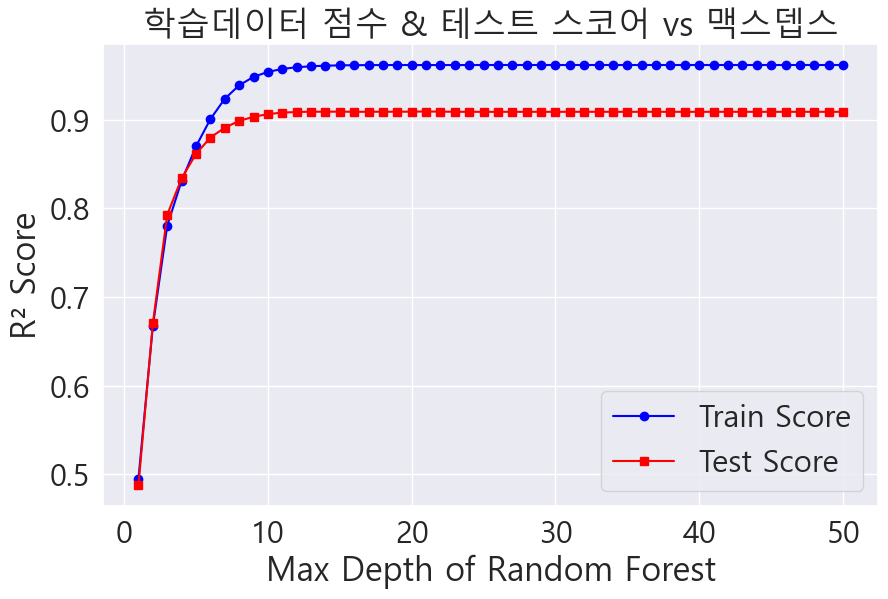

In [314]:
# 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), score_list[0], marker='o', linestyle='-', label='Train Score', color='blue')
plt.plot(range(1, 51), score_list[1], marker='s', linestyle='-', label='Test Score', color='red')

plt.xlabel("Max Depth of Random Forest")
plt.ylabel("R² Score")
plt.title("학습데이터 점수 & 테스트 스코어 vs 맥스뎁스")
plt.legend()
plt.grid(True)
plt.show()

In [315]:
print(score_list[0])
print(score_list[1])

[0.4952860611574911, 0.6673814050532709, 0.7806280074471954, 0.8310535776051903, 0.8699171639597225, 0.900707263081995, 0.9236509724997429, 0.9388778808544326, 0.9483823777111899, 0.9540329310678081, 0.9573110678145089, 0.95927160383523, 0.960358212469732, 0.9610530381133234, 0.9613664469358715, 0.9615799767447679, 0.9616650351423203, 0.9617341567994369, 0.9617904238391843, 0.9617340303133679, 0.96173858761716, 0.9617463304575204, 0.9617393627067091, 0.9617621459521257, 0.9617818542384113, 0.9617854590768178, 0.9617830848906538, 0.9617849502133259, 0.9617843274108512, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413, 0.9617842270810413]
[0.48

각 폴드의 R² Score: [0.86344737 0.83720433 0.90259873 0.91278958 0.81060078]
평균 R² Score: 0.8653


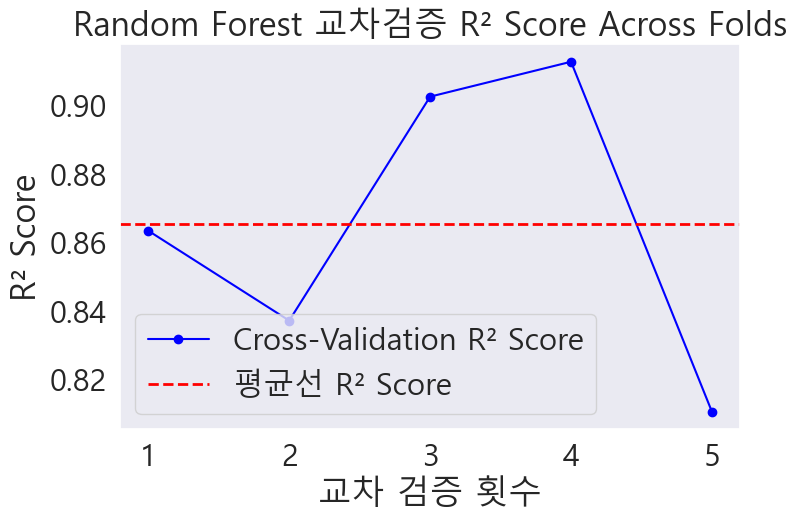

In [316]:
from sklearn.model_selection import cross_val_score

# 10-Fold 교차 검증 실행 (R² Score 사용)
score_list = cross_val_score(rf_model, X_train, y_train, cv=5,scoring='r2')

#  결과 출력
print("각 폴드의 R² Score:", score_list)
print(f"평균 R² Score: {np.mean(score_list):.4f}")

#  교차 검증 결과 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(score_list) + 1), score_list, marker='o', linestyle='-', color='blue', label="Cross-Validation R² Score")
plt.axhline(np.mean(score_list), color='red', linestyle='dashed', linewidth=2, label="평균선 R² Score")  # 평균 선 추가
plt.xlabel("교차 검증 횟수")
plt.ylabel("R² Score")
plt.title("Random Forest 교차검증 R² Score Across Folds")
plt.legend()
plt.grid()
plt.show()

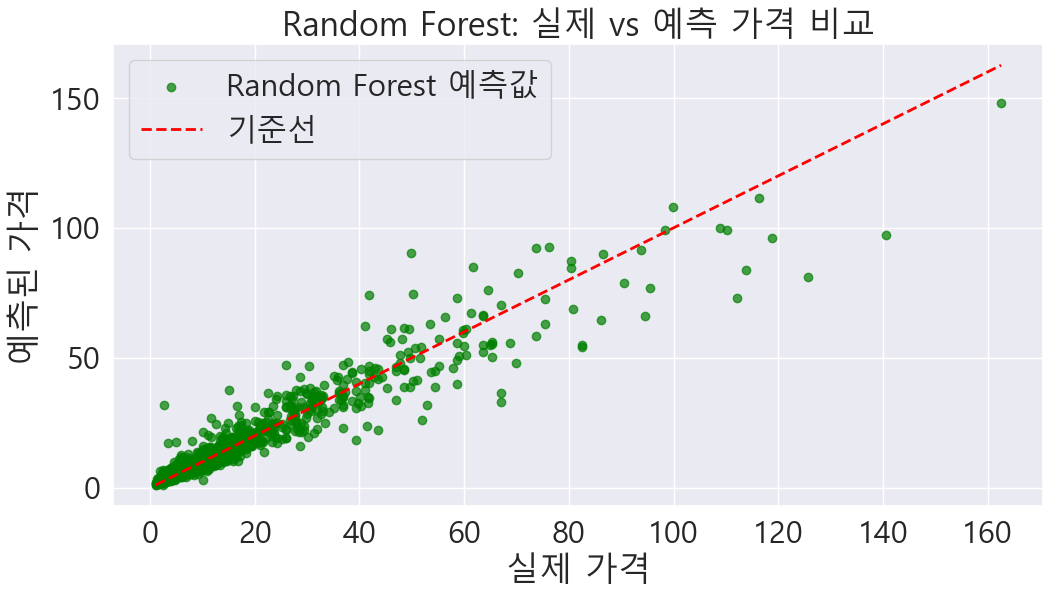

In [317]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test_pred, color='green', alpha=0.7, label="Random Forest 예측값")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed',label='기준선', linewidth=2)
plt.xlabel("실제 가격")
plt.ylabel("예측된 가격")
plt.title("Random Forest: 실제 vs 예측 가격 비교")
plt.legend()
plt.show()